In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/netflix-stock-price-prediction/NFLX.csv


**loading the dataset**

In [102]:
df=pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

**exploratory data analysis**

**check top five rows**

In [103]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**bottom five rows**

In [104]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


**create deep copy object**

it means deep copy object will not effect the original object

In [105]:
viz=df.copy()

**checking missing values**

In [106]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**checking no.of rows and columns**

In [107]:
df.shape

(1009, 7)

**checking dataset information**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


**checking five number summary**

In [109]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


**data preparation**

In [110]:
X=df.drop(["Close","Date","Adj Close"],axis=1)
y=df["Close"]

**splitting the data**

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [112]:
X_train.head()

,Open,High,Low,Volume
810,506.760010,510.480011,503.000000,4388800
2,266.579987,272.450012,264.329987,8981500
481,326.779999,329.859985,325.529999,3806900
477,332.959991,333.820007,326.010010,5036100
308,373.679993,374.579987,369.119995,3821700


In [113]:
y_train.head()

810    510.299988
2      264.559998
481    325.899994
477    329.089996
308    371.829987
Name: Close, dtype: float64

**model creation**

In [114]:
model=LinearRegression()

**model training**

In [115]:
model.fit(X_train,y_train)

LinearRegression()

**model prediction**

In [116]:
y_pred=model.predict(X_test)

In [117]:
y_pred

array([553.99928778, 379.68578595, 360.2986339 , 283.63958688,
       260.03249704, 434.73095701, 260.5186924 , 518.57077155,
       315.40086858, 345.4550411 , 520.06789499, 319.53077998,
       492.61119198, 298.35150899, 509.22038857, 499.1214451 ,
       290.62390384, 550.51598683, 338.00145003, 268.78537144,
       338.8590109 , 293.264409  , 461.38320737, 361.9123619 ,
       288.32554507, 502.66532407, 500.27711611, 295.56918516,
       353.30807461, 368.99679781, 280.34588067, 542.14197701,
       317.49143185, 539.21959054, 309.83470641, 519.5576578 ,
       344.71108798, 367.3511817 , 512.01133287, 633.18788669,
       483.90570545, 298.11012701, 298.62345164, 265.49077931,
       518.02227034, 292.5844311 , 297.37388068, 381.90893829,
       357.25770259, 407.94902456, 367.20643316, 601.17099251,
       481.79140942, 515.01662905, 368.20456508, 418.04802643,
       376.18062312, 356.72094533, 379.50145149, 357.56573178,
       291.31542602, 499.91233262, 491.78438704, 413.64

**check accuracy**

In [118]:
model.score(X_train,y_train)

0.9988550989676761

In [119]:
model.score(X_test,y_test)

0.9982601041694543

In [120]:
result=model.predict([[262.000000, 267.899994, 250.029999, 11896100]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [121]:
result

array([257.09720062])

**check cost function(error)**

In [122]:
print("mse is:",mean_squared_error(y_test,y_pred))
print("mae is:",mean_absolute_error(y_test,y_pred))
print("mape is:",mean_absolute_percentage_error(y_pred,y_test))
print("rmse is:",np.sqrt(mean_squared_error(y_pred,y_test)))


mse is: 19.163612341469143
mae is: 3.1240881273722767
mape is: 0.0077145796166252206
rmse is: 4.377626336437264


In [123]:
def style():
    plt.figure(facecolor='black', figsize=(15,6))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [124]:
viz.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**converting object into datetime datatype**

In [125]:
viz["Date"]=pd.to_datetime(viz["Date"])

In [126]:
viz.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**creating new dataframe**

In [127]:
df2=pd.DataFrame({"date":viz["Date"],"close":viz["Close"]})
df2.set_index("date",inplace=True)

In [128]:
df2.head()

,close
date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


In [129]:
df2.shape

(1009, 1)

In [130]:
df2=df2.asfreq('D')

In [131]:
df2.head()

,close
date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


In [132]:
df2.shape

(1461, 1)

**data vizualization**

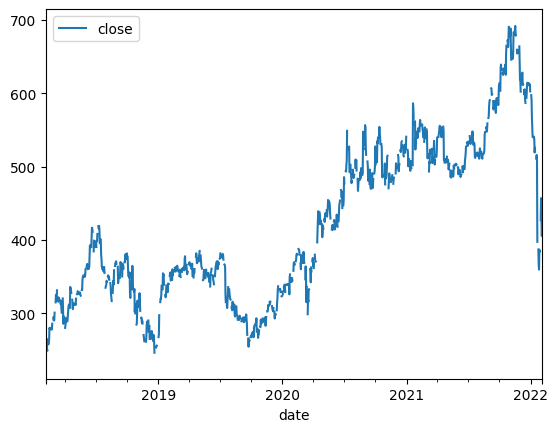

In [133]:
df2.plot()
plt.show()

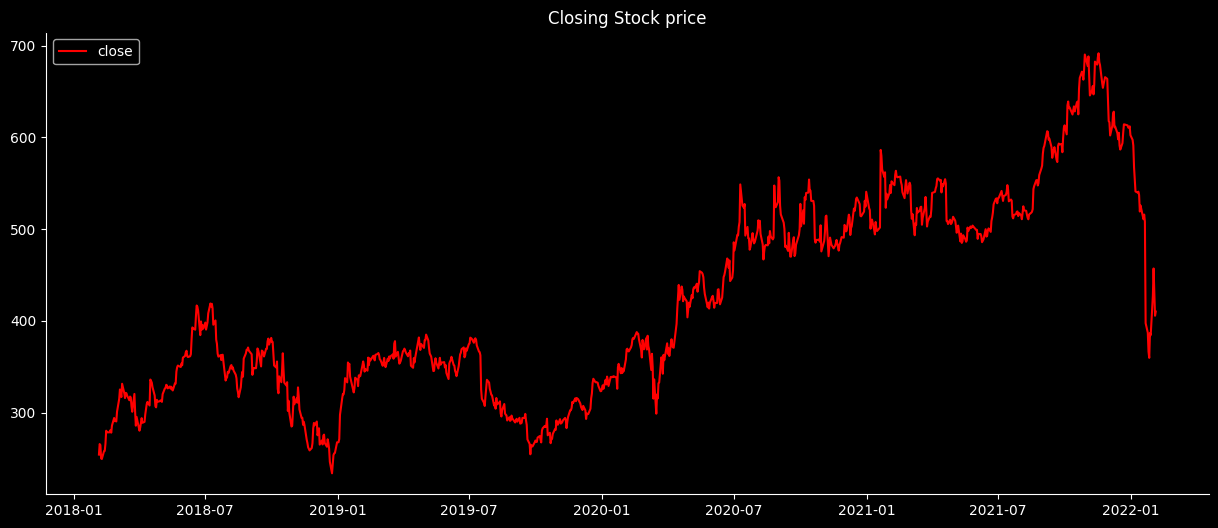

In [134]:
style()

plt.title("Closing Stock price",color="white")
plt.plot(viz["Date"],viz["Close"],color="red")
plt.legend(["close"],loc="upper left",facecolor="black",labelcolor="white")
plt.show()

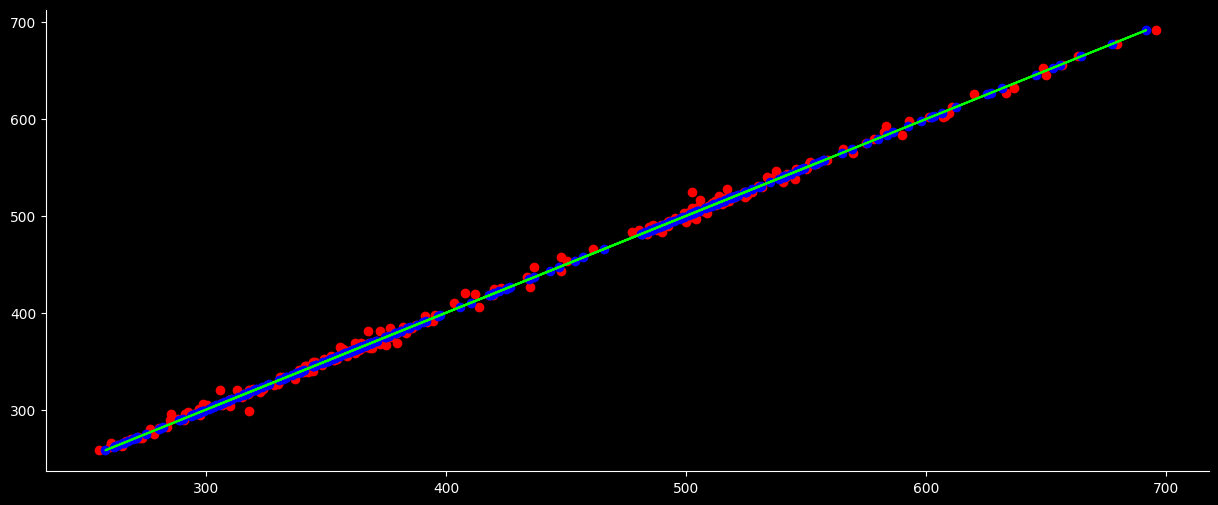

In [135]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [136]:
close=model.predict(X)

In [137]:
df3=pd.DataFrame({"actual":df["Close"],"predicted":close})

In [138]:
df3.describe()

,actual,predicted
count,1009.000000,1009.000000
mean,419.000733,418.864080
std,108.289999,108.264001
min,233.880005,241.531277
25%,331.619995,330.698217
50%,378.670013,377.815831
75%,509.079987,508.877144
max,691.690002,695.788928


In [139]:
df3["Date"]=viz["Date"]

In [140]:
df3.head()

,actual,predicted,Date
0,254.259995,257.097201,2018-02-05
1,265.720001,260.518692,2018-02-06
2,264.559998,269.721462,2018-02-07
3,250.100006,253.571726,2018-02-08
4,249.470001,241.531277,2018-02-09


In [141]:
df3.set_index(["Date"],inplace=True)

In [142]:
df3.head()

,actual,predicted
Date,,
2018-02-05,254.259995,257.097201
2018-02-06,265.720001,260.518692
2018-02-07,264.559998,269.721462
2018-02-08,250.100006,253.571726
2018-02-09,249.470001,241.531277
